In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv
/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv


In [172]:
data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
data.drop('id', axis = 1, inplace = True)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [173]:
og_data = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
og_data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [174]:
data =pd.concat([data,og_data])


In [175]:
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             22869 

In [177]:
data["Gender"] = data["Gender"].map({"Male": 0,
        "Female":1})

In [178]:
data['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [179]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

(array([3.656e+03, 9.844e+03, 5.605e+03, 1.760e+03, 1.016e+03, 7.820e+02,
        1.140e+02, 1.700e+01, 7.200e+01, 3.000e+00]),
 array([14. , 18.7, 23.4, 28.1, 32.8, 37.5, 42.2, 46.9, 51.6, 56.3, 61. ]),
 <BarContainer object of 10 artists>)

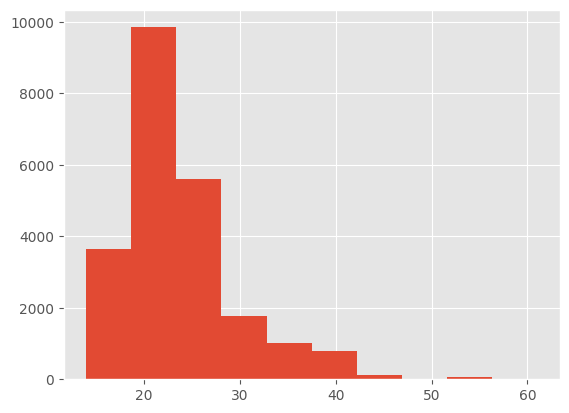

In [180]:
plt.hist(data['Age'])

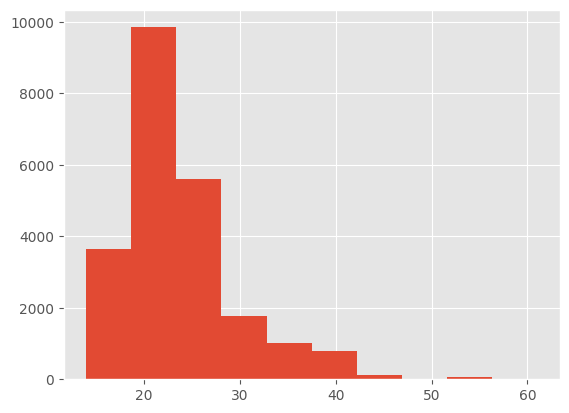

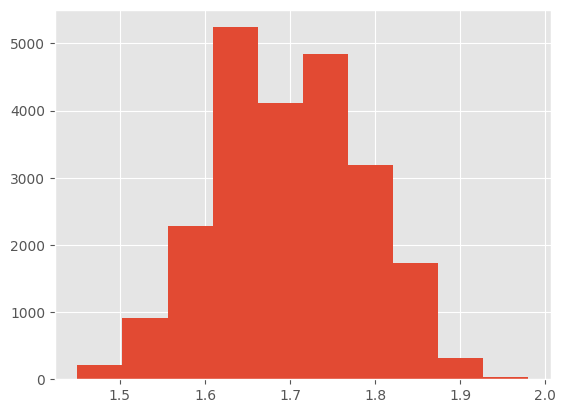

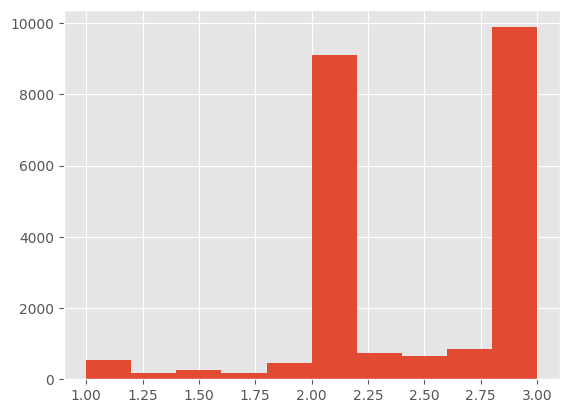

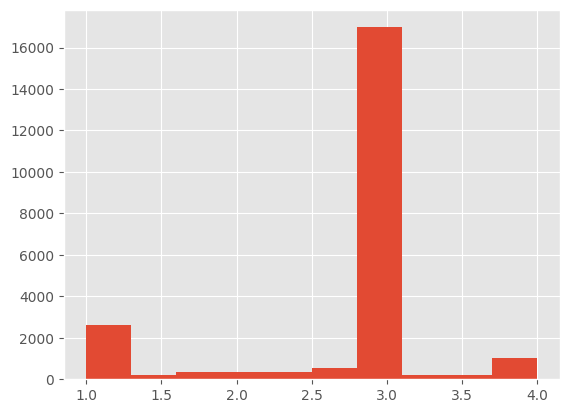

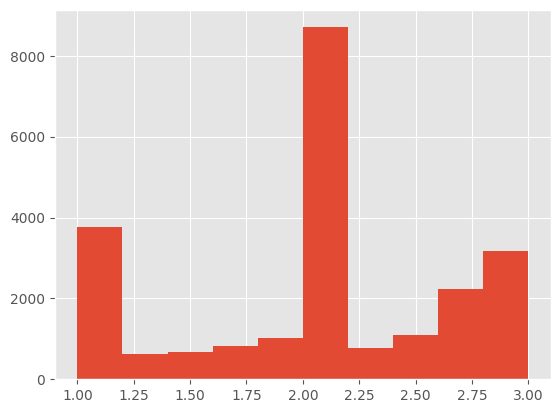

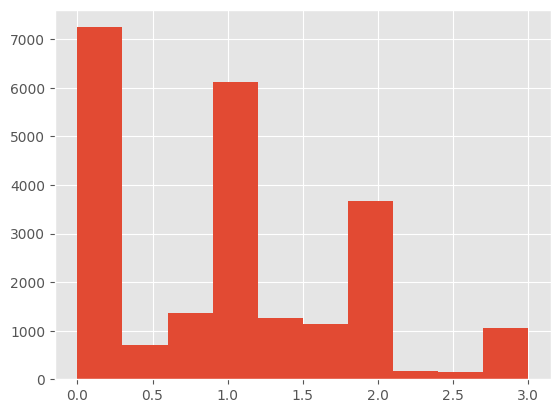

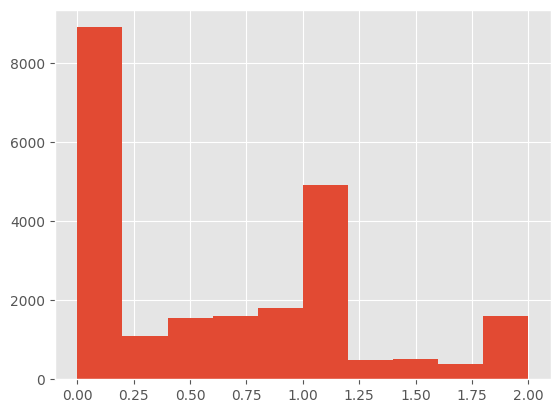

In [181]:
num_col = ["Age","Height","FCVC","NCP","CH2O","FAF","TUE"]

for i in num_col:
    plt.hist(data[i])
    plt.show()

In [182]:
data['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [183]:
data.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

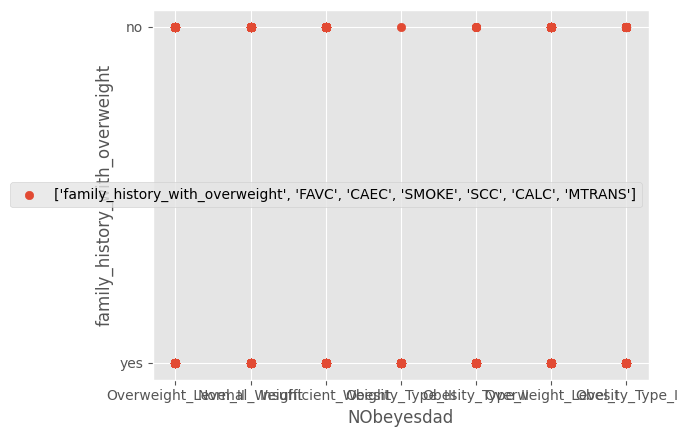

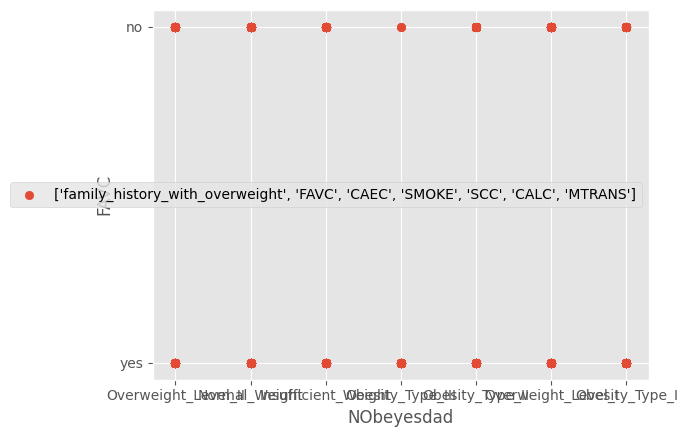

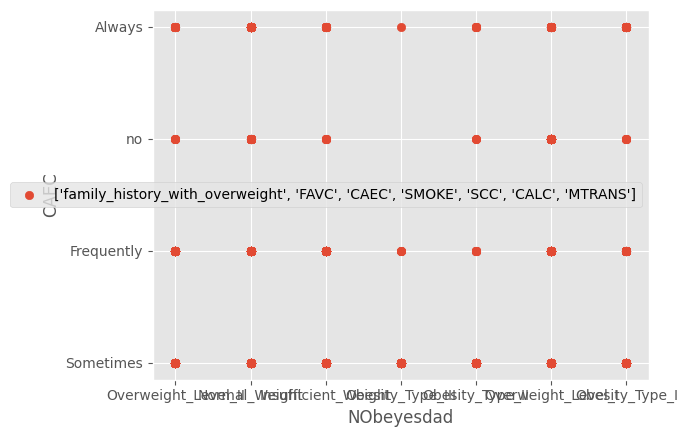

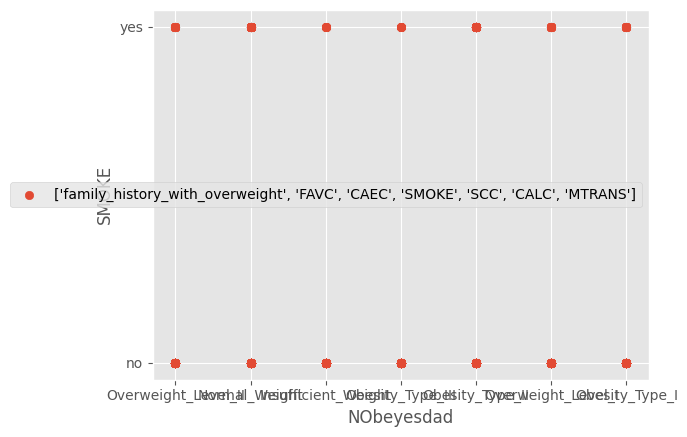

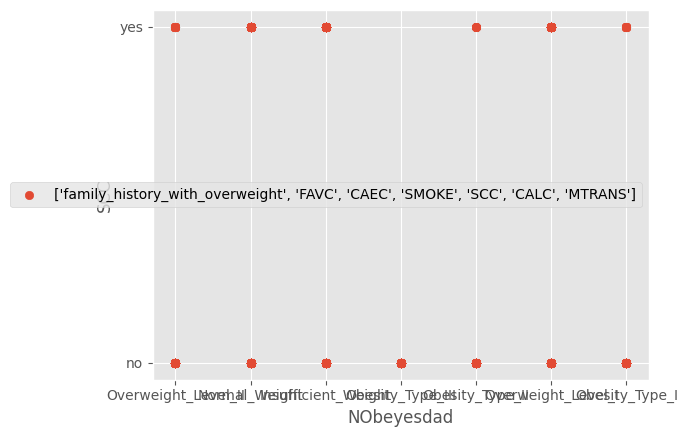

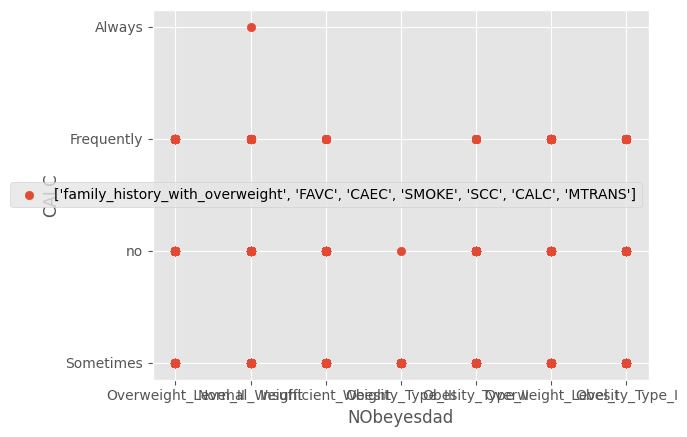

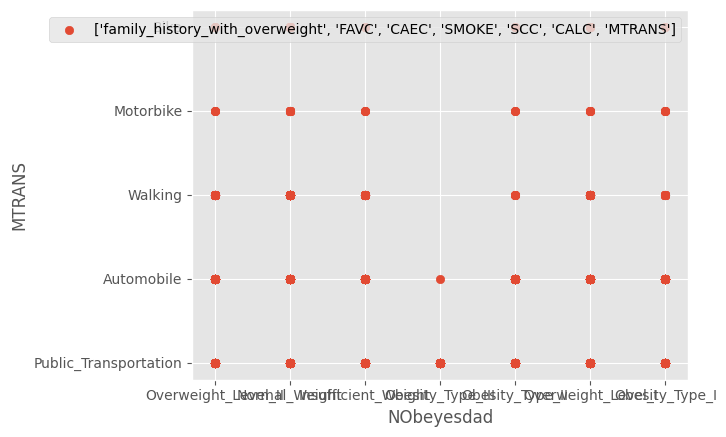

In [184]:
cat_col = ['family_history_with_overweight','FAVC',"CAEC","SMOKE",'SCC',"CALC","MTRANS"]

for i in cat_col:
    plt.scatter(data["NObeyesdad"],data[i], label = cat_col)
    plt.xlabel('NObeyesdad')
    plt.ylabel(i)
    plt.legend()

    # Show the plot
    plt.show()



In [185]:
yes_no_cols = ['family_history_with_overweight','FAVC',"SMOKE",'SCC']

for i in yes_no_cols:
               data[i] = data[i].map({"yes": 0,
        "no":1})

In [186]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,24.443011,1.699998,81.669950,0,0,2.000000,2.983297,Sometimes,1,2.763573,1,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,18.000000,1.560000,57.000000,0,0,2.000000,3.000000,Frequently,1,2.000000,1,1.000000,1.000000,no,Automobile,Normal_Weight
2,1,18.000000,1.711460,50.165754,0,0,1.880534,1.411685,Sometimes,1,1.910378,1,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,1,20.952737,1.710730,131.274851,0,0,3.000000,3.000000,Sometimes,1,1.674061,1,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,0,31.641081,1.914186,93.798055,0,0,2.679664,1.971472,Sometimes,1,1.979848,1,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  int64  
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  int64  
 5   FAVC                            22869 non-null  int64  
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  int64  
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  int64  
 12  FAF                             22869 

In [188]:
data["CAEC"].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [189]:
data["CAEC"] = data["CAEC"].map({"no": 0,
        "Sometimes":1,
        "Frequently":2,
        "Always":3})

In [190]:
data['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [191]:
data["CALC"] = data["CALC"].map({"no": 0,
        "Sometimes":1,
        "Frequently":2})

In [192]:
data["MTRANS"].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [193]:
data["MTRANS"] = data["MTRANS"].map({"Public_Transportation": 0,
        "Automobile":1,
        "Walking":2,
        "Motorbike":3,
        "Bike":4})

In [194]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,24.443011,1.699998,81.669950,0,0,2.000000,2.983297,1,1,2.763573,1,0.000000,0.976473,1.0,0,Overweight_Level_II
1,1,18.000000,1.560000,57.000000,0,0,2.000000,3.000000,2,1,2.000000,1,1.000000,1.000000,0.0,1,Normal_Weight
2,1,18.000000,1.711460,50.165754,0,0,1.880534,1.411685,1,1,1.910378,1,0.866045,1.673584,0.0,0,Insufficient_Weight
3,1,20.952737,1.710730,131.274851,0,0,3.000000,3.000000,1,1,1.674061,1,1.467863,0.780199,1.0,0,Obesity_Type_III
4,0,31.641081,1.914186,93.798055,0,0,2.679664,1.971472,1,1,1.979848,1,1.967973,0.931721,1.0,0,Overweight_Level_II


In [195]:
data["NObeyesdad"].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [196]:
data["NObeyesdad"] = data["NObeyesdad"].map({"Insufficient_Weight": 0,
                                            "Normal_Weight":1,
                                            "Overweight_Level_I":2,
                                            "Overweight_Level_II":3,
                                            "Obesity_Type_I":4,
                                            "Obesity_Type_II":5,
                                            "Obesity_Type_III":6})

In [197]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,24.443011,1.699998,81.669950,0,0,2.000000,2.983297,1,1,2.763573,1,0.000000,0.976473,1.0,0,3
1,1,18.000000,1.560000,57.000000,0,0,2.000000,3.000000,2,1,2.000000,1,1.000000,1.000000,0.0,1,1
2,1,18.000000,1.711460,50.165754,0,0,1.880534,1.411685,1,1,1.910378,1,0.866045,1.673584,0.0,0,0
3,1,20.952737,1.710730,131.274851,0,0,3.000000,3.000000,1,1,1.674061,1,1.467863,0.780199,1.0,0,6
4,0,31.641081,1.914186,93.798055,0,0,2.679664,1.971472,1,1,1.979848,1,1.967973,0.931721,1.0,0,3


In [198]:
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
sample = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [199]:
test['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [200]:
test.drop('id', axis = 1, inplace = True)

yes_no_cols = ['family_history_with_overweight',"SMOKE",'FAVC','SCC']

for i in yes_no_cols:
               test[i] = test[i].map({"yes": 0,
        "no":1})
        

        
test["CAEC"] = test["CAEC"].map({"no": 0,
        "Sometimes":1,
        "Frequently":2,
        "Always":3})

test["CALC"] = test["CALC"].map({"no": 0,
        "Sometimes":1,
        "Frequently":2,
        "Always":3})

test["MTRANS"] = test["MTRANS"].map({"Public_Transportation": 0,
        "Automobile":1,
        "Walking":2,
        "Motorbike":3,
        "Bike":4})

test["Gender"] = test["Gender"].map({"Male": 0,
        "Female":1})

In [201]:
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,26.899886,1.848294,120.644178,0,0,2.938616,3.000000,1,1,2.825629,1,0.855400,0.000000,1,0
1,1,21.000000,1.600000,66.000000,0,0,2.000000,1.000000,1,1,3.000000,1,1.000000,0.000000,1,0
2,1,26.000000,1.643355,111.600553,0,0,3.000000,3.000000,1,1,2.621877,1,0.000000,0.250502,1,0
3,0,20.979254,1.553127,103.669116,0,0,2.000000,2.977909,1,1,2.786417,1,0.094851,0.000000,1,0
4,1,26.000000,1.627396,104.835346,0,0,3.000000,3.000000,1,1,2.653531,1,0.000000,0.741069,1,0


In [202]:
test_id = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test_id = test_id['id']
pd.DataFrame(test_id)
test_id.head()

0    20758
1    20759
2    20760
3    20761
4    20762
Name: id, dtype: int64

In [203]:
sample.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [204]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(['NObeyesdad'],axis=1)
y = data['NObeyesdad']

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

model.fit(X, y)

xgb_pred = model.predict(test)



In [205]:
pd.DataFrame(xgb_pred)
print(xgb_pred)



xgb_data= pd.DataFrame(xgb_pred, columns=['NObeyesdad'])
xgb_data.insert(0, 'id', test_id)
xgb_data["NObeyesdad"] = predicted_data["NObeyesdad"].map({0: "Insufficient_Weight",
                                            1: "Normal_Weight",
                                            2:"Overweight_Level_I",
                                            3:"Overweight_Level_II",
                                            4:"Obesity_Type_I",
                                            5:"Obesity_Type_II",
                                            6:"Obesity_Type_III"})

xgb_data.to_csv('xgb.csv',index = False)

[5 2 6 ... 0 1 5]


In [206]:
import tensorflow_decision_forests as tfdf
import warnings
warnings.filterwarnings("ignore")



label = 'NObeyesdad'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(data, label=label, task = tfdf.keras.Task.CLASSIFICATION)

tfdf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.CLASSIFICATION)
tfdf.compile(metrics=["categorical_accuracy"])
tfdf.fit(train_ds)


Use /tmp/tmp0bh_gjy3 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.396106. Found 22869 examples.
Training model...


[INFO 24-02-28 10:44:30.9685 UTC kernel.cc:1233] Loading model from path /tmp/tmp0bh_gjy3/model/ with prefix ee9680fdc3d141d4


Model trained in 0:00:21.809198
Compiling model...


[INFO 24-02-28 10:44:32.6340 UTC decision_forest.cc:660] Model loaded with 300 root(s), 702046 node(s), and 16 input feature(s).
[INFO 24-02-28 10:44:32.6340 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-02-28 10:44:32.6340 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [207]:
# test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, task = tfdf.keras.Task.CLASSIFICATION)

tfdf_preds = tfdf.predict(test_ds)
tfdf_preds = np.argmax(tfdf_preds, axis=1)
category_names = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
predicted_category_names = [category_names[i] for i in tfdf_preds]

predicted_data= pd.DataFrame(predicted_category_names, columns=['NObeyesdad'])
predicted_data.insert(0, 'id', test_id)

predicted_data.head()

14/14 [==============================] - 1s 89ms/step


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [208]:

predicted_data.to_csv('tfdf_model.csv',index = False)

In [209]:
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,26.899886,1.848294,120.644178,0,0,2.938616,3.000000,1,1,2.825629,1,0.855400,0.000000,1,0
1,1,21.000000,1.600000,66.000000,0,0,2.000000,1.000000,1,1,3.000000,1,1.000000,0.000000,1,0
2,1,26.000000,1.643355,111.600553,0,0,3.000000,3.000000,1,1,2.621877,1,0.000000,0.250502,1,0
3,0,20.979254,1.553127,103.669116,0,0,2.000000,2.977909,1,1,2.786417,1,0.094851,0.000000,1,0
4,1,26.000000,1.627396,104.835346,0,0,3.000000,3.000000,1,1,2.653531,1,0.000000,0.741069,1,0


In [210]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X, y)
lgb_predictions = lgb_model.predict(test)

# CatBoost Model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X, y)
catboost_predictions = catboost_model.predict(test)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2054
[LightGBM] [Info] Number of data points in the train set: 22869, number of used features: 16
[LightGBM] [Info] Start training from score -2.101950
[LightGBM] [Info] Start training from score -1.915166
[LightGBM] [Info] Start training from score -2.130254
[LightGBM] [Info] Start training from score -2.095886
[LightGBM] [Info] Start training from score -1.947748
[LightGBM] [Info] Start training from score -1.864244
[LightGBM] [Info] Start training from score -1.655019


In [211]:
pd.DataFrame(lgb_predictions)


lgb_data= pd.DataFrame(lgb_predictions, columns=['NObeyesdad'])
lgb_data.insert(0, 'id', test_id)
lgb_data["NObeyesdad"] = lgb_data["NObeyesdad"].map({0: "Insufficient_Weight",
                                            1: "Normal_Weight",
                                            2:"Overweight_Level_I",
                                            3:"Overweight_Level_II",
                                            4:"Obesity_Type_I",
                                            5:"Obesity_Type_II",
                                            6:"Obesity_Type_III"})
lgb_data.to_csv('lgb.csv',index = False)

In [212]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X, y)
catboost_predictions = catboost_model.predict(test)




In [215]:
pd.DataFrame(catboost_predictions)


cat_data= pd.DataFrame(catboost_predictions, columns=['NObeyesdad'])
cat_data.insert(0, 'id', test_id)
cat_data["NObeyesdad"] = cat_data["NObeyesdad"].map({0: "Insufficient_Weight",
                                            1: "Normal_Weight",
                                            2:"Overweight_Level_I",
                                            3:"Overweight_Level_II",
                                            4:"Obesity_Type_I",
                                            5:"Obesity_Type_II",
                                            6:"Obesity_Type_III"})

cat_data.to_csv('cat.csv',index = False)

In [217]:
ensemble_pred = np.column_stack((lgb_predictions, catboost_predictions, xgb_pred))

# Create an ensemble prediction by majority voting
final_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=ensemble_pred)

print(final_pred)

[5 2 6 ... 0 1 5]


In [218]:
pd.DataFrame(final_pred)


ens_data= pd.DataFrame(final_pred, columns=['NObeyesdad'])
ens_data.insert(0, 'id', test_id)
ens_data["NObeyesdad"] = ens_data["NObeyesdad"].map({0: "Insufficient_Weight",
                                            1: "Normal_Weight",
                                            2:"Overweight_Level_I",
                                            3:"Overweight_Level_II",
                                            4:"Obesity_Type_I",
                                            5:"Obesity_Type_II",
                                            6:"Obesity_Type_III"})
ens_data.to_csv('model_ensemble.csv',index = False)